In [1]:
import yfinance as yf
import pandas as pd
import os
# Machine learning 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

# For data manipulation 
import pandas as pd 
import numpy as np 

# To plot 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') 

# To ignore warnings 
import warnings 
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("E:\StockMarketPrediction\StockData.csv")

In [9]:
df

,Date,Open,High,Low,Close,Volume
0,04/22/2024,24.28,25.04,24.07,24.93,"117,960"
1,04/19/2024,23.49,24.29,23.49,24.00,"89,946"
2,04/18/2024,23.35,23.69,23.20,23.57,"87,293"
3,04/17/2024,23.85,23.99,23.31,23.32,"65,290"
4,04/16/2024,23.97,23.97,23.63,23.74,"61,361"
...,...,...,...,...,...,...
58,01/29/2024,25.30,25.48,24.80,25.38,"124,793"
59,01/26/2024,25.33,25.64,25.11,25.31,"156,362"
60,01/25/2024,24.69,25.25,24.52,25.17,"99,352"
61,01/24/2024,24.77,24.91,24.09,24.22,"65,554"


In [10]:
# Changes The Date column as index columns 
df.index = pd.to_datetime(df['Date']) 
df 

# drop The original date column 
df = df.drop(['Date'], axis='columns') 
df 


,Open,High,Low,Close,Volume
Date,,,,,
2024-04-22,24.28,25.04,24.07,24.93,"117,960"
2024-04-19,23.49,24.29,23.49,24.00,"89,946"
2024-04-18,23.35,23.69,23.20,23.57,"87,293"
2024-04-17,23.85,23.99,23.31,23.32,"65,290"
2024-04-16,23.97,23.97,23.63,23.74,"61,361"
...,...,...,...,...,...
2024-01-29,25.30,25.48,24.80,25.38,"124,793"
2024-01-26,25.33,25.64,25.11,25.31,"156,362"
2024-01-25,24.69,25.25,24.52,25.17,"99,352"


In [11]:
# Create predictor variables 
df['Open-Close'] = df.Open - df.Close 
df['High-Low'] = df.High - df.Low 

# Store all predictor variables in a variable X 
X = df[['Open-Close', 'High-Low']] 
X.head() 


,Open-Close,High-Low
Date,,
2024-04-22,-0.65,0.97
2024-04-19,-0.51,0.80
2024-04-18,-0.22,0.49
2024-04-17,0.53,0.68
2024-04-16,0.23,0.34


In [12]:
# Target variables 
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) 
y


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [13]:
split_percentage = 0.8
split = int(split_percentage*len(df)) 

# Train data set 
X_train = X[:split] 
y_train = y[:split] 

# Test data set 
X_test = X[split:] 
y_test = y[split:]


In [14]:
# Support vector classifier 
cls = SVC().fit(X_train, y_train)


In [15]:
df['Predicted_Signal'] = cls.predict(X)


In [16]:
# Calculate daily returns 
df['Return'] = df.Close.pct_change()


In [17]:
# Calculate strategy returns 
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)


In [18]:
# Calculate Cumulutive returns 
df['Cum_Ret'] = df['Return'].cumsum() 
df


,Open,High,Low,Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,
2024-04-22,24.28,25.04,24.07,24.93,"117,960",-0.65,0.97,0,NaN,NaN,NaN
2024-04-19,23.49,24.29,23.49,24.00,"89,946",-0.51,0.80,0,-0.037304,-0.000000,-0.037304
2024-04-18,23.35,23.69,23.20,23.57,"87,293",-0.22,0.49,0,-0.017917,-0.000000,-0.055221
2024-04-17,23.85,23.99,23.31,23.32,"65,290",0.53,0.68,1,-0.010607,-0.000000,-0.065828
2024-04-16,23.97,23.97,23.63,23.74,"61,361",0.23,0.34,1,0.018010,0.018010,-0.047818
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,25.30,25.48,24.80,25.38,"124,793",-0.08,0.68,0,0.006344,0.000000,0.030837
2024-01-26,25.33,25.64,25.11,25.31,"156,362",0.02,0.53,1,-0.002758,-0.000000,0.028079
2024-01-25,24.69,25.25,24.52,25.17,"99,352",-0.48,0.73,0,-0.005531,-0.005531,0.022548


In [19]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum() 
df


,Open,High,Low,Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,
2024-04-22,24.28,25.04,24.07,24.93,"117,960",-0.65,0.97,0,NaN,NaN,NaN,NaN
2024-04-19,23.49,24.29,23.49,24.00,"89,946",-0.51,0.80,0,-0.037304,-0.000000,-0.037304,0.000000
2024-04-18,23.35,23.69,23.20,23.57,"87,293",-0.22,0.49,0,-0.017917,-0.000000,-0.055221,0.000000
2024-04-17,23.85,23.99,23.31,23.32,"65,290",0.53,0.68,1,-0.010607,-0.000000,-0.065828,0.000000
2024-04-16,23.97,23.97,23.63,23.74,"61,361",0.23,0.34,1,0.018010,0.018010,-0.047818,0.018010
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,25.30,25.48,24.80,25.38,"124,793",-0.08,0.68,0,0.006344,0.000000,0.030837,0.477288
2024-01-26,25.33,25.64,25.11,25.31,"156,362",0.02,0.53,1,-0.002758,-0.000000,0.028079,0.477288
2024-01-25,24.69,25.25,24.52,25.17,"99,352",-0.48,0.73,0,-0.005531,-0.005531,0.022548,0.471756


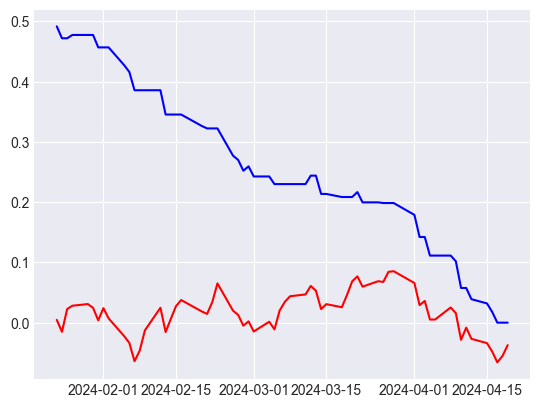

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(df['Cum_Ret'],color='red') 
plt.plot(df['Cum_Strategy'],color='blue')

#Our Strategy(Blue Line) Provided the return of 18.87 % in the last 1 year whereas the stock of Reliance Industries (Red Line) Provides the Return of just 5.97%  in the last 1 year.
